In [1]:
import requests
from bs4 import BeautifulSoup

In [10]:
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

params = {
    "q": "한글"
}

url = "https://www.google.co.kr/search"

# https://www.google.co.kr/search?
#     q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0&oq=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0     <<<쿼리
#     &aqs=chrome..69i57j69i61j35i39j0l3.2686j0j7
#     &sourceid=chrome&ie=UTF-8

사이트를 탐색하면서 링크 정보를 따오는것 = 크롤링

In [11]:
html = requests.get(url, params=params, headers=headers)

In [12]:
type(html)    #Response 객체

requests.models.Response

In [13]:
html.encoding

'UTF-8'

In [14]:
# html.text    #받아온 byte 정보를 str로 바꿔서 출력
dom = BeautifulSoup(html.text, "lxml")

In [15]:
type(dom)

bs4.BeautifulSoup

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=mkVNW7eWCdGD-QaBk5agAw">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.kr/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwi3y62a_aTcAhXRQd4KHYGJBTQQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwi3y62a_aTcAhXRQd4KHYGJBTQQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/s
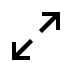

In [16]:
dom.select("a")   #css selector - 모든 a tag를 찾아줌

In [19]:
aList = dom.select("div.rc > h3.r > a")    #div(class=rc) 하위의 h3(class=r) 하위의 a 탐색

In [21]:
for row in aList:
    print(row["href"])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [62]:
#url을 반복적으로 긁어오는 메소드
def getUrl(url, params=None, select = "a" , num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<= html.status_code <600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text , "html.parser")
    links = dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href")==True]

In [23]:
links = getUrl(url, params)

In [24]:
len(links)

9

In [25]:
links

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'https://www1.president.go.kr/petitions/154276',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y',
 'https://www.microsoft.com/ko-kr/download/details.aspx?id=36772']

In [63]:
seed = "https://www.google.co.kr/search"
select = "div.rc > h3.r > a"
# queue = [seed]
queue = getUrl(seed, params, select)
result = list()


In [41]:
#seed에 연결된 a 태그들에 연결된 a 태그들 탐색
while queue:
    url = queue.pop()
    result.extend(getUrl(url, params))
    print(url, len(result))

https://www.microsoft.com/ko-kr/download/details.aspx?id=36772 93
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y 357
https://www1.president.go.kr/petitions/154276 512
https://www.korean.go.kr/hangeul/principle/001.html 528
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8 598
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80 1676
https://namu.wiki/w/%ED%95%9C%EA%B8%80 2866
https://www.hancom.com/product/productWindowsMain.do 2924
http://www.hancom.com/downLoad.downPU.do 3070


실습

In [42]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
select = "table.title_bg > tbody > a"
# queue = [seed]
queue = getUrl(seed, params, select)
result = list()

In [43]:
queue   #뽐뿌사이트는 못가져옴

[]

In [65]:
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding":None
}
#header 부분의 accept encoding 이 설정되어있으면 byte 데이터를 알아서 인코딩해옴 > 여기서는 euc-kr로 가져와서 한글이 깨지는 문제. 따라서 스스로 인코딩을 하지 않도록 설정해줌
html = requests.get(seed, params=params, headers=headers)
# html.text  하면 깨짐
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" hr

In [72]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
select = "tr.list1 > td.list_vspace img + a"
contentList = getUrl(seed, params, select)
contentList = contentList[1:]

뽐뿌사이트는 태그 구조가 제대로 안지켜졌기 때문에 lxml로 파싱할 때 깨져서 잘 못불러옴 -> parser를 바꿔줘야 함 -> html.parser

In [73]:
contentList

['view.php?id=freeboard&page=1&divpage=1111&no=5951889',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951887',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951885',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951883',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951881',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951879',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951877',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951875',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951873',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951871',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951869',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951867',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951865',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951863']

scraping : 주소를 주면 봇이 링크 대신 컨텐츠를 수집 - 필요한 특정 영역을 지정해서 긁어옴

In [89]:
seed = "http://www.ppomppu.co.kr/zboard/"

for url in contentList[:3]:
    title = getContent(seed+url, params, ".view_title2")
    content = getContent(seed+url, params, "table.pic_bg table td.han")
    print("========")
    print("<"+title[0].get_text()+">")
    
    print(content[0].get_text().strip())

<아크티스7 무선 헤드셋>
이벤트 행사 공유 드려요~
 
30% 할인으로 169,000원에 판매 합니다~
 
https://shopping.naver.com/play/stores/1000011810/products/2298737627?NaPm=ct%3Djjp278xc%7Cci%3Db0a0cad546a0812d239d6ce294a73ee6a878409e%7Ctr%3Dslc%7Csn%3D207934%7Cic%3D%7Chk%3D88e02a6403c18aa590279eb733b1b149d98de8e1
<KTm 5390원 1.7요금제번이시킨거 나노유심으로 왔네요>
일반으로 주문했는데
 
나노유심하고 어뎁터랑 보냈네요.
 
애네 요새 이렇게 보내는지...
 
발송은 빠르네요
<더운데 나왔습니다>
청소하고 빨래돌리고..
온 몸에서 육수가 뿜듯이 나와ㅓ
찬물로 샤워한판하고
한그릇 하러 나왔네요

먹고
커피숍가서 잉여잉여 하다가
마트도 갔다가
저녁 출근 준비해야겠어요


시간 때 일부러 늦게 나왔더니
가게 사장님이 시간 잘 맞춰왔다고 ㅎㅎ
2-30분 기다리고 난리도 아니었다네요


In [108]:
#url을 반복적으로 긁어오는 메소드
def getContent(url, params=None, select = "a" , num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    text = html.content.decode("euc-kr", "ignore")
    
    if 500<= html.status_code <600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(text , "html.parser")
    links = dom.select(select)
    
    return links

In [79]:
title

[<font class="view_title2"><!--DCM_TITLE-->아크티스7 무선 헤드셋<!--/DCM_TITLE--></font>]

In [81]:
title[0].get_text()

'아크티스7 무선 헤드셋'

In [109]:
for url in contentList:
    title = getContent(seed+url, params, ".view_title2")
    content = getContent(seed+url, params, "table.pic_bg table td.han")
    writer = getContent(seed+url, params, "div#quote b a")
    comments = getContent(seed+url, params, "div#quote div.han")
    print("<TITLE>")
    print(title[0].get_text())
    print("\n<CONTENT>")
    print(content[0].get_text().strip())
    print("\n<COMMENTS>")

    no = 1
    for comment in comments:
        print("["+str(no)+"]", end=" ")
        print("작성자: ",writer[no-1].get_text())
        print("내용:" ,comment.get_text(),"\n")
        no += 1
        
    print()

<TITLE>
아크티스7 무선 헤드셋

<CONTENT>
이벤트 행사 공유 드려요~
 
30% 할인으로 169,000원에 판매 합니다~
 
https://shopping.naver.com/play/stores/1000011810/products/2298737627?NaPm=ct%3Djjp278xc%7Cci%3Db0a0cad546a0812d239d6ce294a73ee6a878409e%7Ctr%3Dslc%7Csn%3D207934%7Cic%3D%7Chk%3D88e02a6403c18aa590279eb733b1b149d98de8e1

<COMMENTS>
[1] 작성자:  뚜뚜기
내용: 광고를 하려면 다른거도 올려가믄서 하든가요 

[2] 작성자:  PERS0NA
내용: 음.. 

[3] 작성자:  
내용: 여름에 땀나라고 올린건가여? 

[4] 작성자:  
내용: ㅉㅉ 

[5] 작성자:  
내용: 광고 


<TITLE>
KTm 5390원 1.7요금제번이시킨거 나노유심으로 왔네요

<CONTENT>
일반으로 주문했는데
 
나노유심하고 어뎁터랑 보냈네요.
 
애네 요새 이렇게 보내는지...
 
발송은 빠르네요

<COMMENTS>
[1] 작성자:  오티머스O
내용: 그런지 몇달된듯. 

[2] 작성자:  
내용: 글쿤요 작년에 바꾸고 몰랐네요.ㅋ
저 어댑터쓰다 핀 날려먹어서 핸드폰하나 날렸는데 걱정이네요 

[3] 작성자:  레이디안
내용: 나노유심에 어댑터로 보내주는게 나중을 생각하더라도 훨씬 좋습니다.
나중에 신형기기에 유심 컷팅해서 쓰려다 인식 안되면 복잡해 지니까요 

[4] 작성자:  카이라이
내용: 며칠 걸리셨나요? 저도 주문했는데 아직 소식이 없네요 

[5] 작성자:  
내용: 어댑터 쓰는 것보다 마이크로 유심받는 게 훨 낫습니다.
신형바꾸려면 차라리 유심 자르는 게 낫죠. 망치면 새로 사면 되니까요.
폰 날려보면 무슨 말인지 알겁니다. 

[6] 작성자:  
내용: 저도 괜찮다고는 보는데
어댑터쓰다 핀날려먹은적이 있었던지라
선택지에도 일반유심선택사항이 

<TITLE>
 인간이 목숨걸고 싸우면

<CONTENT>
호랑이, 사자, 곰, 표범, 재규어, 퓨마, 늑대, 치타, 삵 중에서

치타랑 삵까지는 해볼만 하겠죠?

저번에 유튜브 영상보니 치타까지가 마지노선 같아 보이더군요.

<COMMENTS>
[1] 작성자:  뽀송해
내용: 치타를요? 

[2] 작성자:  뽐뿌팍팍
내용: 상위 몇퍼센트의 인간이겠죠 

[3] 작성자:  
내용: 표도르도 힘들다에 한표겁니다. 

[4] 작성자:  **익명을요구하셨습니다**
내용: 맨손으로요??? (어리둥절) 

[5] 작성자:  풀꽃남자
내용: 고양이랑 싸워도 손이 걸래가 되는데.. 

[6] 작성자:  버들피리
내용: 어떤 무기가 주어지나요?
전기톱? 양손 쿠크리? 

[7] 작성자:  
내용: 치타도 목숨걸고 싸우면요? 

[8] 작성자:  너는자연인이다
내용: 칼잇으면 가능할수도 

[9] 작성자:  
내용: 현실은 앞발에 한대맞고 찢김 

[10] 작성자:  그녀의팔길이는두뼘
내용: 맨몸이면 치타가 한계 

[11] 작성자:  파사현정
내용: 

생각보다 목둘레가 작고 지구력이 약하다고 하더군요. 

[12] 작성자:  
내용: 저 사이즈면 성체가 아닌거같은데요.. 너무작은데;; 

[13] 작성자:  
내용: 치타 무는 힘이 약하고 체력도 약해서 성인남자면 해볼만 해요 

[14] 작성자:  그녀의팔길이는두뼘
내용: 저정도면 성체입니다 
표범이랑 헷갈리면안되요.. 

[15] 작성자:  갤럭시7
내용: 큰 고양이 아닌가요? 

[16] 작성자:  다시만날그대
내용: 치타가 생각보다 순하다고 다큐에서 본적 있어요 

[17] 작성자:  
내용: 고양이랑 목숨걸고 싸웠나요? ㅋ 

[18] 작성자:  인형사
내용: 차타는 목숨까지 안걸어도 되요 

[19] 작성자:  선의의악플
내용: 치타를 쫓아낸 사례는 많다고 합니다. 

[20] 작성자:  Mini™
내용: 뭐가 서로 맘이 안맞아서 싸우기까지 했어요... 

[21] 작성자:  
내용: 차타는데 목숨까지 걸어야 해